1) Calculate How many properties in each neighbour hood group

2) Which Neighbour Hood Group Has highest prices use bar chart to show this for all neighbourhood groups

3) Which Neighboorhood group has lowest prices use bar chart to show this for all neighbourhood groups

4) Highest and lowest price airbnb in each Neighbour Hood Group


5) Which Host has Highest count of properties

6) Which neighbourhood is most expensive and cheapest top 10 barchart

7) Count different type of room_type and do a pie chart showing % of each room type in overall dataset

8) scatter plot between longitutude and latitude for different neighbourhood groups
9) scatter plot between longitutude and latitude for different room_types

10) Do a similar plot to this

11)  room_type vs price bar chart for the mean and highest and lowest

12) Preprocess dataset  and apply random forest decision tree svm and ann

last_review remove this column


host_name delete rows with nan

month_review fill with mean

Others nan can also be filled nby mean or mode

do categorical to numerical and apply models
drop name column

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv('AB_NYC_2019.csv', parse_dates=[0], index_col=0)

In [ ]:
df

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,,,
2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27


In [ ]:
df.columns


Index(['name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [ ]:
df.shape

(48895, 15)

In [ ]:
# 1) Calculate How many properties in each neighbour hood group
neighborhood_counts = df['neighbourhood_group'].value_counts()

print(neighborhood_counts)

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64


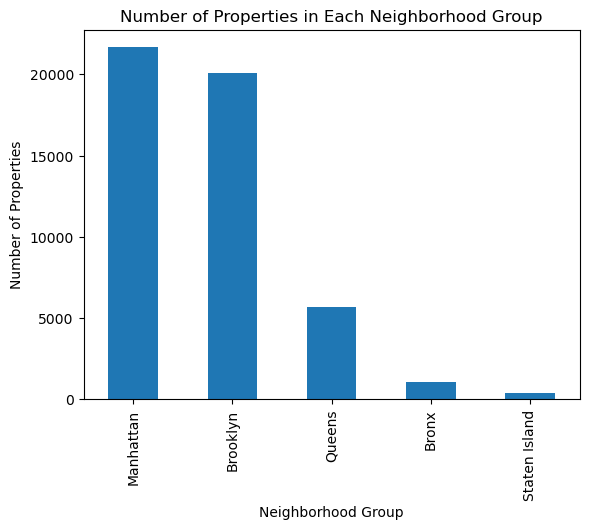

In [ ]:
# Create the bar chart
neighborhood_counts.plot(kind='bar')

# Set the chart title and axis labels
plt.title("Number of Properties in Each Neighborhood Group")
plt.xlabel("Neighborhood Group")
plt.ylabel("Number of Properties")

# Display the chart
plt.show()

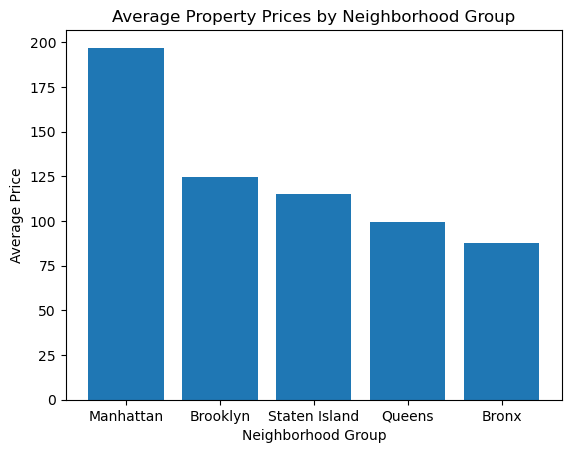

In [ ]:
##  2) Which Neighbour Hood Group Has highest prices use bar chart to show this for all neighbourhood groups

# Group the df by the neighborhood group and calculate the average price for each group:

neighborhood_prices = df.groupby('neighbourhood_group')['price'].mean()

# Sort the neighborhood prices in descending order to identify the highest priced group
sorted_neighborhood_prices = neighborhood_prices.sort_values(ascending=False)

# Create the bar chart
plt.bar(sorted_neighborhood_prices.index, sorted_neighborhood_prices)

# Set the chart title and axis labels
plt.title("Average Property Prices by Neighborhood Group")
plt.xlabel("Neighborhood Group")
plt.ylabel("Average Price")

# Display the chart
plt.show()





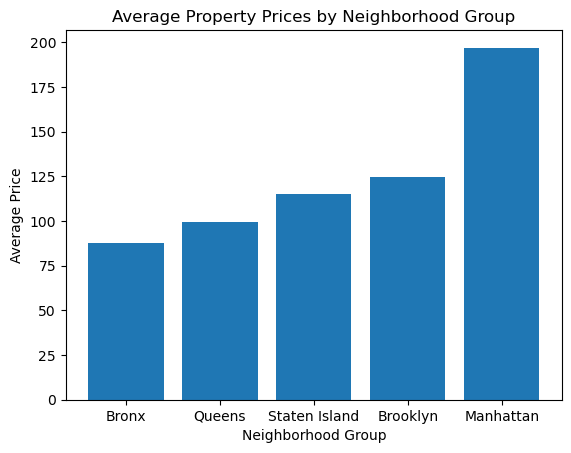

In [ ]:
## 3) Which Neighboorhood group has lowest prices use bar chart to show this for all neighbourhood groups

neighborhood_prices = df.groupby('neighbourhood_group')['price'].mean()

# Sort the neighborhood prices in ascending order to identify the lowest priced group
sorted_neighborhood_prices = neighborhood_prices.sort_values()

# Create the bar chart
plt.bar(sorted_neighborhood_prices.index, sorted_neighborhood_prices)

# Set the chart title and axis labels
plt.title("Average Property Prices by Neighborhood Group")
plt.xlabel("Neighborhood Group")
plt.ylabel("Average Price")

# Display the chart
plt.show()







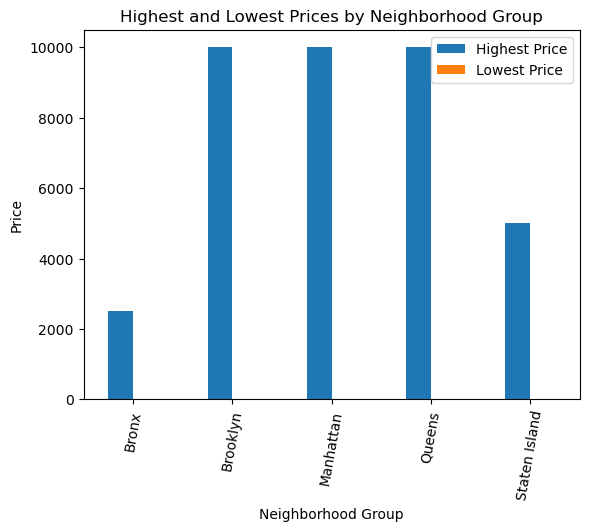

In [ ]:
# 4) Highest and lowest price airbnb in each Neighbour Hood Group
group_prices = df.groupby('neighbourhood_group')['price'].agg(['max', 'min'])
group_prices.plot(kind='bar')
plt.xlabel('Neighborhood Group')
plt.ylabel('Price')
plt.title('Highest and Lowest Prices by Neighborhood Group')
plt.legend(['Highest Price', 'Lowest Price'])
plt.xticks(rotation=80)
plt.show()


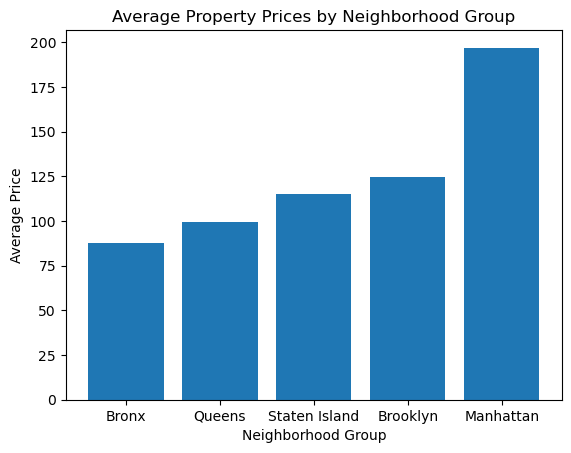

In [ ]:


#'df' with columns 'neighborhood_group' and 'price'

neighborhood_prices = df.groupby('neighbourhood_group')['price'].mean()

# Sort the neighborhood prices in ascending order to identify the lowest priced group
sorted_neighborhood_prices = neighborhood_prices.sort_values()

# Create the bar chart
plt.bar(sorted_neighborhood_prices.index, sorted_neighborhood_prices)

# Set the chart title and axis labels
plt.title("Average Property Prices by Neighborhood Group")
plt.xlabel("Neighborhood Group")
plt.ylabel("Average Price")

# Display the chart
plt.show()

In [ ]:
# 5) Which Host has Highest count of properties

# Group the df by the host_name column and count the number of properties for each host
host_counts = df.groupby('host_name')['host_id'].count()

# Find the host with the highest count

host_with_highest_count = host_counts.idxmax()
highest_count = host_counts.max()

print("Host with the highest count:", host_with_highest_count)
print("Highest count of properties:", highest_count)

Host with the highest count: Michael
Highest count of properties: 417


In [ ]:
df.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,,,
2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


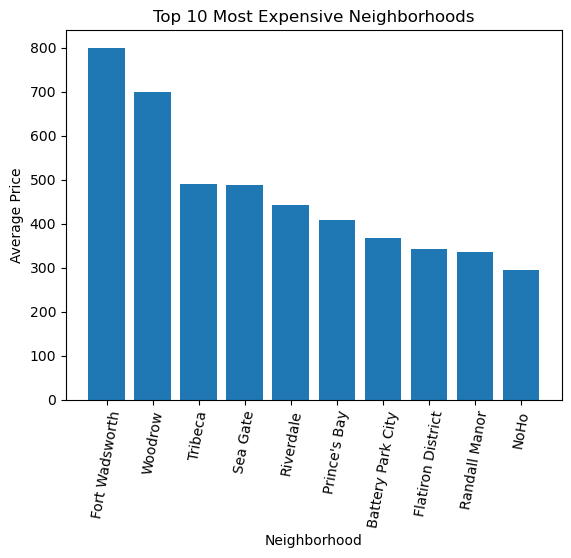

In [ ]:
# 6) Which neighbourhood is most expensive and cheapest top 10 barchart

## Group the df by the neighborhood and calculate the average price for each neighborhood

neighborhood_prices = df.groupby('neighbourhood')['price'].mean()

#Sort the average prices in descending order to determine the most expensive and cheapest neighborhoods
sorted_neighborhoods = neighborhood_prices.sort_values(ascending=False)
most_expensive_neighborhoods = sorted_neighborhoods.head(10)
cheapest_neighborhoods = sorted_neighborhoods.tail(10)

# Bar chart for top 10 most expensive neighborhoods
plt.bar(most_expensive_neighborhoods.index, most_expensive_neighborhoods)
plt.xlabel('Neighborhood')
plt.ylabel('Average Price')
plt.title('Top 10 Most Expensive Neighborhoods')
plt.xticks(rotation=80)
plt.show()

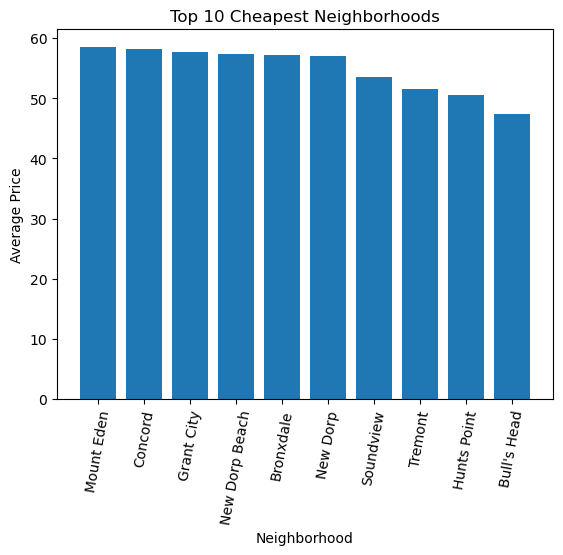

In [ ]:
# Bar chart for top 10 cheapest neighborhoods:
plt.bar(cheapest_neighborhoods.index, cheapest_neighborhoods)
plt.xlabel('Neighborhood')
plt.ylabel('Average Price')
plt.title('Top 10 Cheapest Neighborhoods')
plt.xticks(rotation=80)
plt.show()


In [ ]:
# 7) Count different type of room_type and do a pie chart showing % of each room type in overall dataset

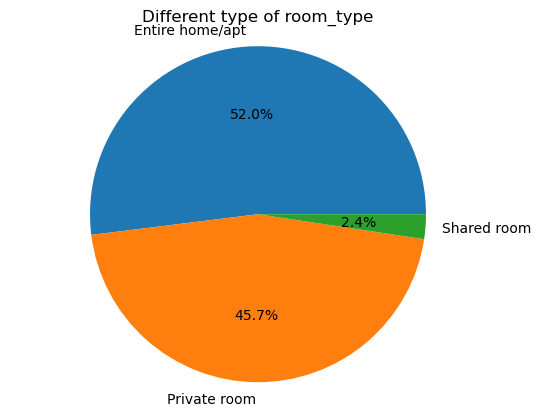

In [ ]:
# count the occurrences of each room_type
room_type_counts = df['room_type'].value_counts()
plt.pie(room_type_counts, labels=room_type_counts.index, autopct='%1.1f%%')
plt.title('Different type of room_type')
plt.axis('equal')
plt.show()


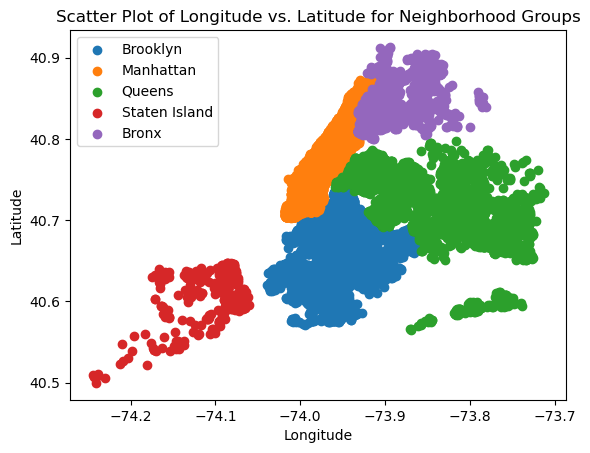

In [ ]:
## 8) scatter plot between longitutude and latitude for different neighbourhood groups

groups = df['neighbourhood_group'].unique()

for group in groups:
    group_data = df[df['neighbourhood_group'] == group]
    plt.scatter(group_data['longitude'], group_data['latitude'], label=group)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Longitude vs. Latitude for Neighborhood Groups')
plt.legend()
plt.show()

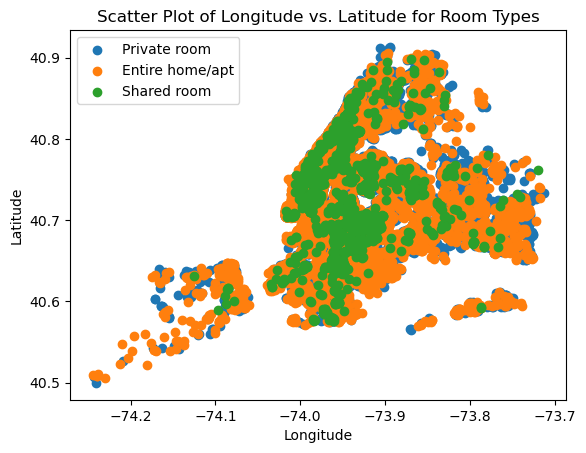

In [ ]:
## 9) scatter plot between longitutude and latitude for different room_types
room_types = df['room_type'].unique()

for room_type in room_types:
    room_data = df[df['room_type'] == room_type]
    plt.scatter(room_data['longitude'], room_data['latitude'], label=room_type)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Longitude vs. Latitude for Room Types')
plt.legend()
plt.show()

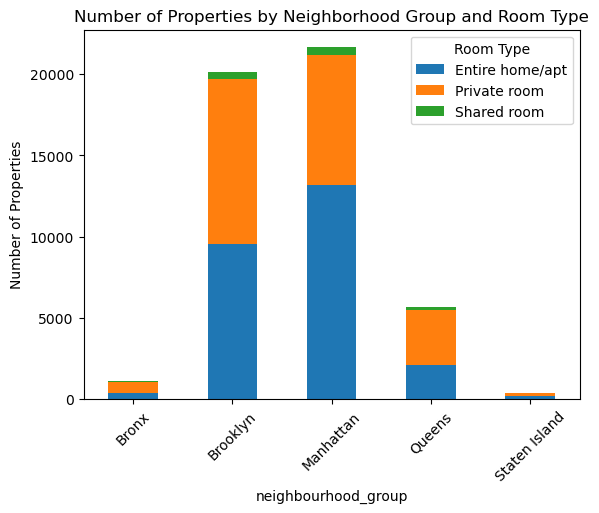

In [ ]:
## To create a stacked bar chart representing the number of properties and room types for each neighborhood group

# Group the DataFrame by neighborhood group and room type, and count the number of properties
grouped_data = df.groupby(['neighbourhood_group', 'room_type']).size().unstack()
grouped_data.plot(kind='bar', stacked=True)
plt.xlabel('neighbourhood_group')
plt.ylabel('Number of Properties')
plt.title('Number of Properties by Neighborhood Group and Room Type')
plt.xticks(rotation=45)
plt.legend(title='Room Type')
plt.show()

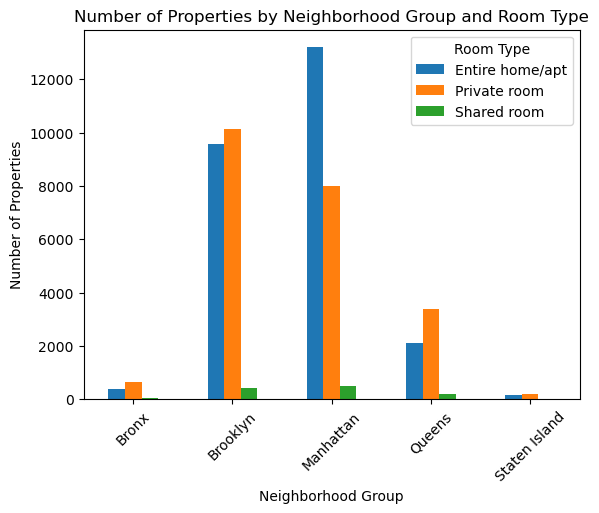

In [ ]:
# create a bar graph representing the number of properties and room types for each neighborhood group
grouped_data = df.groupby(['neighbourhood_group', 'room_type']).size().reset_index(name='Count')
grouped_data.pivot(index='neighbourhood_group', columns='room_type', values='Count').plot(kind='bar')
plt.xlabel('Neighborhood Group')
plt.ylabel('Number of Properties')
plt.title('Number of Properties by Neighborhood Group and Room Type')
plt.xticks(rotation=45)
plt.legend(title='Room Type')
plt.show()

In [ ]:
df.reset_index(inplace=True, drop=True)

In [ ]:
df.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48879 non-null  object 
 1   host_id                         48895 non-null  int64  
 2   host_name                       48874 non-null  object 
 3   neighbourhood_group             48895 non-null  object 
 4   neighbourhood                   48895 non-null  object 
 5   latitude                        48895 non-null  float64
 6   longitude                       48895 non-null  float64
 7   room_type                       48895 non-null  object 
 8   price                           48895 non-null  int64  
 9   minimum_nights                  48895 non-null  int64  
 10  number_of_reviews               48895 non-null  int64  
 11  last_review                     38843 non-null  object 
 12  reviews_per_month               

In [ ]:
## 12) Preprocess dataset  and apply random forest decision tree svm and ann


# last_review remove this column
df = df.drop('last_review', axis=1)

# host_name delete rows with nan
df = df.dropna(subset=['host_name', 'name'])
# month_review fill with mean

# Others nan can also be filled nby mean or mode
df = df.fillna(df.mean())

# do categorical to numerical and apply models
# drop name column
df = df.drop(['name', 'host_name'], axis=1)

/var/folders/fp/4dqsnfmn6_sccky6kgrdvxjr0000gn/T/ipykernel_78894/2187817593.py:12: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.mean())


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48858 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         48858 non-null  int64  
 1   neighbourhood_group             48858 non-null  object 
 2   neighbourhood                   48858 non-null  object 
 3   latitude                        48858 non-null  float64
 4   longitude                       48858 non-null  float64
 5   room_type                       48858 non-null  object 
 6   price                           48858 non-null  int64  
 7   minimum_nights                  48858 non-null  int64  
 8   number_of_reviews               48858 non-null  int64  
 9   reviews_per_month               48858 non-null  float64
 10  calculated_host_listings_count  48858 non-null  int64  
 11  availability_365                48858 non-null  int64  
dtypes: float64(3), int64(6), object(

In [ ]:
cat = [i for i in df.columns if df[i].dtypes=='object']
num = [i for i in df.columns if i not in cat]
print(len(df.columns), len(cat), len(num))


12 3 9


In [ ]:
cat_encoded = pd.get_dummies(df[cat])

In [ ]:
df = pd.concat([df, cat_encoded], axis=1)

In [ ]:
df = df.drop(cat, axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48858 entries, 0 to 48894
Columns: 238 entries, host_id to room_type_Shared room
dtypes: float64(3), int64(6), uint8(229)
memory usage: 14.4 MB


In [ ]:
X=df.drop(['price'],axis=1)
y=df['price']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=50)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
Y_pred_rf = rf.predict(X_test)
accuracy=accuracy_score(y_test,Y_pred_rf)
print('accuracy_random_Forest : %.3f' %accuracy)

accuracy_random_Forest : 0.094


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
accuracy_knn=accuracy_score(y_test,Y_pred)
print('accuracy_KNN : %.3f' %accuracy)

accuracy_KNN : 0.095


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
y_pred = logistic_regression.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %.3f' % accuracy)




Accuracy: 0.044


/Users/ganeshghimire/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
